In [1]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import string, re
import urllib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from nltk.corpus import stopwords

In [2]:
april = pd.read_csv('../Data/2018/listings42018sum.csv')
may = pd.read_csv('../Data/2018/listings52018sum.csv')
july = pd.read_csv('../Data/2018/listings72018sum.csv')
august = pd.read_csv('../Data/2018/listings82018sum.csv')
september = pd.read_csv('../Data/2018/listings92018sum.csv')
october = pd.read_csv('../Data/2018/listings102018sum.csv')
november = pd.read_csv('../Data/2018/listings112018sum.csv')
december = pd.read_csv('../Data/2018/listings122018sum.csv')

In [3]:
april['month'] = 'april'
may['month'] = 'may'
july['month'] = 'july'
august['month'] = 'august'
september['month'] = 'september'
october['month'] = 'october'
november['month'] = 'november'
december['month'] = 'december'

In [4]:
frames = [april,may,july,august,september,october,november,december]
data_2018 = pd.concat(frames)

In [5]:
data_2018.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month
0,2318,"Casa Madrona - Urban Oasis, 1 block from the P...",2536,Megan,Central Area,Madrona,47.610819,-122.290816,Entire home/apt,296,4,15,2018-04-04,0.13,1,283,april
1,4291,Sunrise in Seattle Master Suite,35749,Jess & Joey,Other neighborhoods,Roosevelt,47.687801,-122.313427,Private room,82,2,54,2017-08-27,0.93,5,280,april
2,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.523980,-122.359891,Entire home/apt,48,3,423,2018-03-29,4.30,1,157,april
3,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.654109,-122.337605,Entire home/apt,90,2,109,2017-12-07,1.02,3,324,april
4,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.550620,-122.320135,Private room,65,2,118,2018-02-08,1.26,5,357,april


In [6]:
data_2018['reviews_per_month'] = data_2018['reviews_per_month'].fillna(0)
ohe = OneHotEncoder(sparse=False)
neigh_group = ohe.fit_transform(data_2018[['neighbourhood_group']])
neigh_group_cat = ohe.categories_
neigh = ohe.fit_transform(data_2018[['neighbourhood']])
neigh_cat = ohe.categories_
room = ohe.fit_transform(data_2018[['room_type']])
room_cat = ohe.categories_
month_group = ohe.fit_transform(data_2018[['month']])
month_group_cat = ohe.categories_

In [7]:
def rename(name_of_columns,pre_addition):
    new_list = []
    for x in name_of_columns:
        for x in x:
            new_list.append(pre_addition+ '' + x)
    return new_list

In [8]:
new_neigh_group_cat = rename(neigh_group_cat,'neighbourhood_group: ')
new_neigh_cat = rename(neigh_cat,'neighbourhood: ')
new_room_cat = rename(room_cat,'room_type: ')
new_month_group_cat = rename(month_group_cat,'month: ')

In [9]:
neigh_group_df = pd.DataFrame(data=neigh_group,columns=new_neigh_group_cat)
neigh_df = pd.DataFrame(data=neigh,columns=new_neigh_cat)
room_type_df = pd.DataFrame(data=room,columns = new_room_cat)
month_df = pd.DataFrame(data=month_group,columns=new_month_group_cat)

In [10]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
vectorizer = TfidfVectorizer(strip_accents='unicode',stop_words=stopwords_list,min_df=30, ngram_range=(1,3))
data_2018.fillna({'name':''}, inplace=True)
tf_idf = vectorizer.fit_transform(data_2018['name'])
nlp_name = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
clean_data = data_2018.drop(columns = ['id','month','host_name','host_id','last_review','name',
month_df

In [12]:
clean_data['longitude'] = clean_data['longitude'].round(decimals=5)
clean_data['latitude'] = clean_data['latitude'].round(decimals=5)

In [ ]:
clean_data = clean_data.reset_index()

In [ ]:
clean_data = pd.concat([clean_data,neigh_group_df,neigh_df,room_type_df,nlp_name,month_df],axis=1)

In [ ]:
X = clean_data.drop(columns = ['price'])
y = clean_data['price']

In [ ]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_ss,y)

In [ ]:
clean_data = data_2018.drop(columns = ['id','month','host_name','host_id','last_review','name',
                                       'neighbourhood_group','neighbourhood','room_type'])


In [ ]:
rfr = RandomForestRegressor(n_estimators=1000,min_samples_split=5,min_samples_leaf=3,random_state=42)
rfr.fit(Xtrain,ytrain)
rfr.score(Xtrain,ytrain)
ypredtrain = rfr.predict(Xtrain)
ypredtest = rfr.predict(Xtest)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(ytrain,ypredtrain))
print(r2_score(ytest,ypredtest))

In [40]:
ids = data_2018.id

In [38]:
ids = ids.reset_index

AttributeError: 'function' object has no attribute 'reset_index'

In [43]:
ids = pd.DataFrame(ids)

In [47]:
ids = ids.reset_index()

In [50]:
ids =ids.drop(columns = 'index')

In [57]:
ids['id'].value_counts()s

23748596    8
7274556     8
20029096    8
20934326    8
17184477    8
           ..
30477354    1
22772444    1
17790080    1
23874577    1
30133203    1
Name: id, Length: 11232, dtype: int64

In [59]:
data_2018[data_2018['id']==23748596]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month
7616,23748596,Sonya's House- Apartment 1!,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,0,NaN,0.00,5,0,april
7198,23748596,Sonya's House- Apartment 1!,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,0,NaN,0.00,5,0,may
7146,23748596,Sonya's House- Apartment 101,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,12,2018-07-12,6.43,5,142,july
7042,23748596,Sonya's House- Apartment 101,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,20,2018-08-07,6.98,5,125,august
6888,23748596,Sonya's House- Apartment 101,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,28,2018-09-03,7.30,5,176,september
6787,23748596,Sonya's House- Apartment 101,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,33,2018-09-25,6.97,5,142,october
6647,23748596,Sonya's House- Apartment 101,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,40,2018-10-28,6.78,5,118,november
6403,23748596,Sonya's House- Apartment 101,159259469,FengE,Other neighborhoods,Fremont,47.65681,-122.34531,Entire home/apt,100,1,43,2018-12-02,6.29,5,96,december


In [65]:
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [78]:

query1 = pysqldf("""SELECT month,avg(price) AS price FROM data_2018 group by month
            ORDER BY 
            case 
                when month = 'april' then 1
                when month = 'may' then 2
                when month = 'july' then 3
                when month = 'august' then 4
                when month = 'september' then 5
                when month = 'october' then 6
                when month = 'november' then 7
                else 8
                end""")



<BarContainer object of 8 artists>

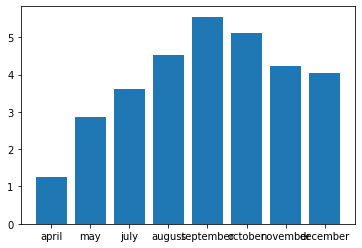

In [87]:
plt.bar(x=query1['month'],height=(query1['price']-148))